### Overview

In this portion, we will be implementing convolution from scratch to get a hands-on experience of how it works. We will be implementing the following functions from scratch:
- Zero padding
- Convolution operation

In [1]:
# making all the necessary imports here
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
from google.colab.patches import cv2_imshow
# you may include more libraries here if needed
import glob

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding image matrix (5 marks)
- From the 'assets' folder, read the image "`upside-down-me.jpg`" using `cv2.imread()` function.

<b>Note:</b> `cv2.imread()` function gives you the pixel `numpy` array of the image you read. You can apply all `numpy` methods to the pixel array to manipulate the image in your own way.

- Display the dimensions of the pixel array.
- Greyscale the image using `cv2.cvtColor()` method and then display the dimensions of the pixel array.

Do you see the difference in the dimensions? why is it so?
It is because the dimensions are different for the greyscaled image. There is no longer a third dimension of size 3 and the image is now simply a 2D array. This is because there is no longer a need for RGB values, the pixel values can simply be a value between 0 and 255 to represent the intensity. This color would then be between black and white.

- Display the greyscalled image using `cv2_imshow()` method.
- We can see that the spidey in the image seems upside down. Let us help him correct his poster by making him upright straight

Dimensions of image are:  (466, 350, 3)
Dimensions of grayscaled image are:  (466, 350)


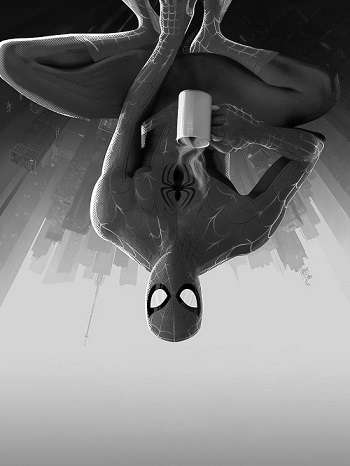

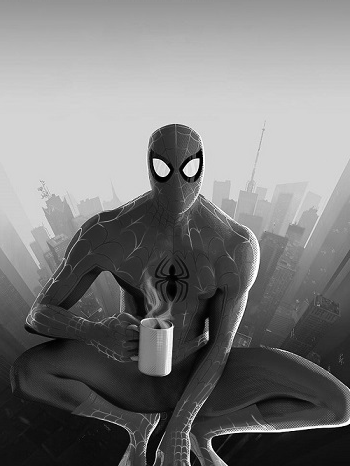

In [2]:
# Read the image
example_image_path = "drive/MyDrive/CV_Assignments/assets/upside-down-me.jpg"
example_image = cv2.imread(example_image_path)

# Display its dimensions

print("Dimensions of image are: ", example_image.shape)

# Greyscale it

gray_example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2GRAY)

# Display the dimensions of the greyscalled image

print("Dimensions of grayscaled image are: ", gray_example_image.shape)

# Display the greyscalled image

cv2_imshow(gray_example_image)

# Correct the poster of spidey and display it

# Using the numpy.rot90 method twice to rotate a full 180 degrees
rotated_example = np.rot90(gray_example_image)
rotated_example = np.rot90(rotated_example)

cv2_imshow(rotated_example)


### Zero-Padding

Zero-padding adds zeros around the border of an image.

The main benefits of padding are the following:

- It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.

- It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.

In [3]:
def zero_pad(X, pad):
    """
    Arguments:
    X -- python numpy array of shape (H, W) representing an image where H represents the height and W representd the width
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    """

    # Calculating the new dimensions for the matrice

    old_x, old_y = X.shape
    new_x = old_x + 2*pad
    new_y = old_y + 2*pad
    new_dim = (new_x, new_y)

    # Initializing the new matrice to zero
    X_pad = np.zeros(new_dim)

    # Filling in the values in the matrice
    for i in range(pad,new_x - pad):
      for j in range(pad, new_y - pad):
        X_pad[i][j] = X[i-pad][j-pad]


    return X_pad

### Visualization of Zero padding
Just run the following cell to see if padding's working fine.

Shape of x_pad:  (7, 7)


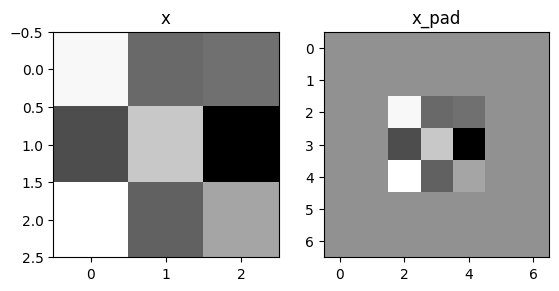

In [4]:
# visualizing the zero_pad's fucntion's output.
np.random.seed(1)
x = np.random.randn(3, 3)
x_pad = zero_pad(x, 2)
print("Shape of x_pad: ", x_pad.shape)
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x,cmap='gray')
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad,cmap='gray')

### 2D Convolution

2D covolution is the process of applying a filter to an image. Implement the <code>conv2D</code> function that will be used to build a convolutional unit which:

- Takes an input image
- Applies a filter keeping as per padding and stride parameters
- Outputs another image (usually, but not necessarily, of different size)

In [5]:
# Helper function to multiply and sum the elements of two matrices
def convHelp (mat1, mat2):

  f = mat2.shape[0]

  res = 0
  for i in range(f):
    for j in range(f):
      res += mat1[i][j] * mat2[i][j]

  return res

def conv2D(inp, F, pad, stride):
    """
    Arguments:
    inp -- output activations of the previous layer (can also be conceptualized as the input image), numpy array of shape (n_H, n_W)
    F -- Filter, numpy array of shape (f, f)
    pad -- integer
    stride -- integer
    """


    f = F.shape[0]

    # Getting new dimensions according to formula provided
    x_dim = int( (inp.shape[0] - f + 2*pad)/stride + 1 )
    y_dim = int( (inp.shape[1] - f + 2*pad)/stride + 1 )

    # Initializing new matrice with zeros
    conv_output = np.zeros((x_dim,y_dim))

    # Padding the image
    new_img = zero_pad(inp,pad)

    # loop for every possible convolution overlap
    for i in range(0,x_dim,stride):
        for j in range(0,y_dim,stride):
          # seperating the overlapping area
          temp_mat = new_img[i:i+f,j:j+f]
          # getting the convolution sum for this specific overlap
          temp = convHelp (temp_mat, F)
          # placing the value in the final matrice
          conv_output[i][j] = temp

    return conv_output

### Testing Convolution
- Use Lord Voldemort's picture (`voldemort.jpg`) in the `assets` folder and greyscale it.
- Resize it to 350x400.
- Come up with a filter that sharpens The Dark Lord's face.
- Use the `conv2D` function you defined above to apply that filter to the image.
- Display the unsharp and the sharpened images.


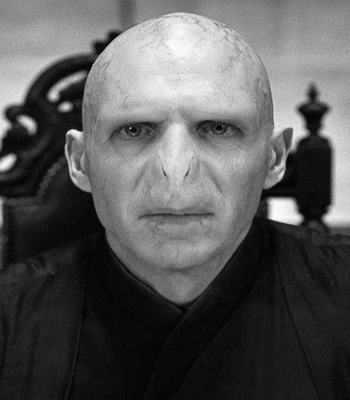

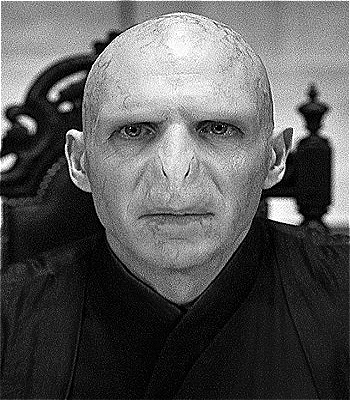

In [6]:
# Reading the image and grayscaling it
test_image_path = "drive/MyDrive/CV_Assignments/assets/voldemort.jpg"
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Resizing to 350x400
test_image = cv2.resize(test_image, (350,400), interpolation= cv2.INTER_LINEAR)

# using the sharpening filter shown in class which is the identity matrice + the Laplacian filter
sharpening_filter = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
sharpening_filter = np.array(sharpening_filter)

# Displaying the image before sharpening
cv2_imshow(test_image)

# Convoluting with a padding of 1 which is the floor of half of the filter dimensions (3/2 ==> 1)
after_conv = conv2D(test_image,sharpening_filter,1,1)

# Displaying the image after sharpening
cv2_imshow(after_conv)

### Filter Banks

We will be experimenting with some kinds of filters. Some questions may require us to come up with your own filters as well

### Edge Detection
We are required to do the following tasks:
- <b>Read</b> the image(s) provided to you in the `Images` folder.
- We are required to apply various pre-processing techniques on the read image(s) to prepare them for edge detection tasks. This should be done keeping in mind that the task is of edge detection and not color detection.

In [7]:
# read all the provided images "Images" folder in a list here

base_path = "drive/MyDrive/CV_Assignments/Images/*/"

# making a dictionary for simple labelling of images and easy grouping for the below tasks
input_images = dict()

# using glob to recursively iterate trhough all the images in the possible route

for folder in glob.glob(base_path):
  # Slicing the foldername from the path string
  label = folder[36:-1]

  # making an empty list for the category of images
  input_images[label] = []

  string = folder +'/*.jpg'
  for img in glob.glob(string):

    # Reading in grayscale directly
    n= cv2.imread(img,cv2.IMREAD_GRAYSCALE)

    # Resizing to 200x200 so that images have a standard size
    n = cv2.resize(n, (200,200), interpolation= cv2.INTER_LINEAR)

    # Adding to list of images of that category
    input_images[label].append(n)

  # Repeating the above steps in case some images are of png format instead of jpg format
  string = folder +'/*.png'
  for img in glob.glob(string):

    n= cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    n = cv2.resize(n, (200,200), interpolation= cv2.INTER_LINEAR)

    input_images[label].append(n)




Study the images to see how they are laid out before starting with the following tasks:
- Make a filter that gives a "high" activation on horizontal lines
- Make a filter that gives a "high" activation on vertical lines
- Make a filter that gives a "high" activation on circles
- Make a filter that gives a "high" activation on right to left diagonals
- Make a filter that gives a "high" activation on left to right diagonals


#### Horizontal Filter

Image before filter: 


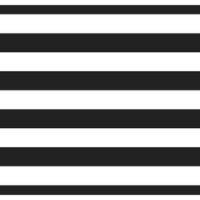

Filtered Image: 


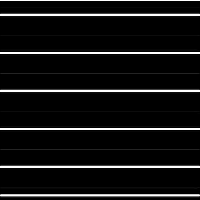

Image before filter: 


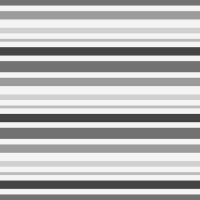

Filtered Image: 


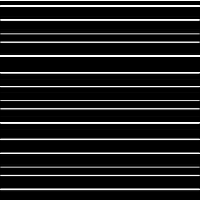

Image before filter: 


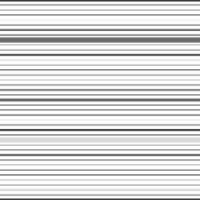

Filtered Image: 


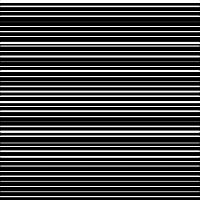

In [9]:
# initialize and apply horizontal edge detection filter on images in "Horizontal Lines" folder and display the results

# Multiplying the filter shown in class by 2 so that difference is more obvious. This will not affect the values since the sum of the filter is still 0
h_filter = np.array([[-2,-2,-2],[2,2,2],[0,0,0]])

# Selecting the corresponding images from the previously made dictionary
h_images = input_images['Horizontal Lines']

for image in h_images:
  print("Image before filter: ")
  cv2_imshow(image)
  # Applying the filter by the convolution function
  post_filter = conv2D(image,h_filter,1,1)
  print("Filtered Image: ")
  cv2_imshow(post_filter)


#### Vertical Filter

Image before filter: 


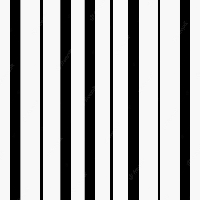

Filtered Image: 


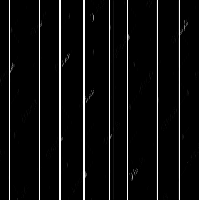

Image before filter: 


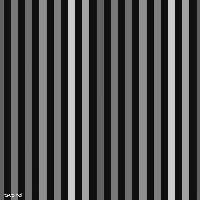

Filtered Image: 


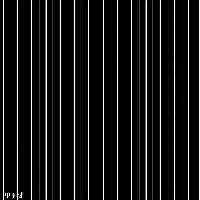

Image before filter: 


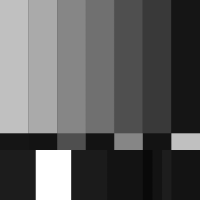

Filtered Image: 


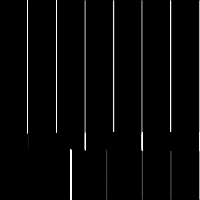

In [10]:
# initialize and apply vertical edge detection filter on images in "Vertical Lines" folder and display the results

# Rotating the previous filter by 90 degrees allows us to detect vertical edges instead of horizontal edges.
# Tuned the values to be 3 instead of 2 so that lines would be clearer
v_filter = np.array([[0,3,-3],[0,3,-3],[0,3,-3]])

# Repeating the steps from the previous cell
v_images = input_images['Vertical Lines']

for image in v_images:
  print("Image before filter: ")
  cv2_imshow(image)
  post_filter = conv2D(image,v_filter,1,1)
  print("Filtered Image: ")
  cv2_imshow(post_filter)


#### Right to Left Diagonal Filter

Image before filter: 


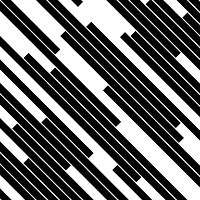

Filtered Image: 


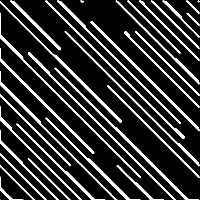

Image before filter: 


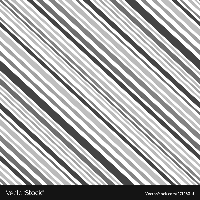

Filtered Image: 


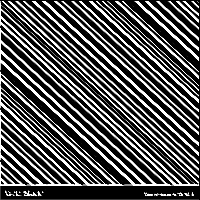

In [11]:
# initialize and apply right-to-left diagonal edge detection filter on the images in "Right to Left" folder and display the results

# Diagonal Variant of Sobel filter
rlDiag_filter = np.array([[0,  1,  2], [-1,  0, 1], [-2, -1, 0]])

# Repeating the steps from the previous cell
rl_images = input_images['Right to Left']

for image in rl_images:
  print("Image before filter: ")
  cv2_imshow(image)
  post_filter = conv2D(image,rlDiag_filter,1,1)
  print("Filtered Image: ")
  cv2_imshow(post_filter)


#### Left to Right Diagonal Filter

Image before filter: 


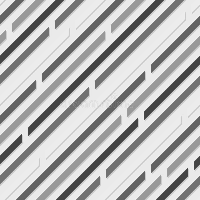

Filtered Image: 


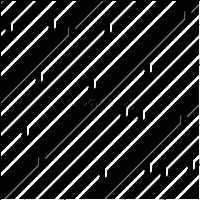

Image before filter: 


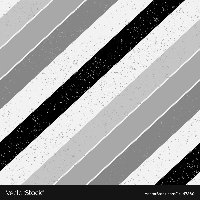

Filtered Image: 


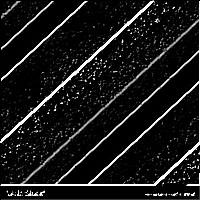

In [12]:
# initialize and apply left-to-right diagonal edge detection filter on the images in "Left to Right" folder and display the results

# Diagonal Variant of Sobel filter, reverse of filter used above for Right to Left Lines
lrDiag_filter = np.array([[2,  1,  0], [1,  0, -1], [0, -1, -2]])

# Repeating the steps from the previous cell
lr_images = input_images['Left to Right']

for image in lr_images:
  print("Image before filter: ")
  cv2_imshow(image)
  post_filter = conv2D(image,lrDiag_filter,1,1)
  print("Filtered Image: ")
  cv2_imshow(post_filter)


#### Circle Filter

Image before filter: 


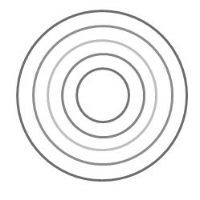

Filtered Image: 


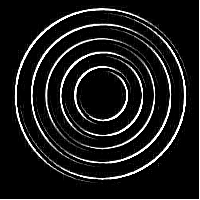

Image before filter: 


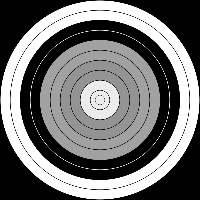

Filtered Image: 


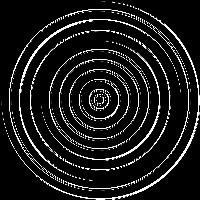

In [13]:
# initialize and apply circular pattern's edge detection filter on the images in "Circles" folder and display the results.

# Combining all previous filters to detect circles, since curves are basically straight lines when zoomed in
c_filter = lrDiag_filter + rlDiag_filter + v_filter + h_filter

# Repeating the steps from the previous cell
c_images = input_images['Circles']

for image in c_images:
  print("Image before filter: ")
  cv2_imshow(image)
  post_filter = conv2D(image,c_filter,1,1)
  print("Filtered Image: ")
  cv2_imshow(post_filter)


#### Fun Part

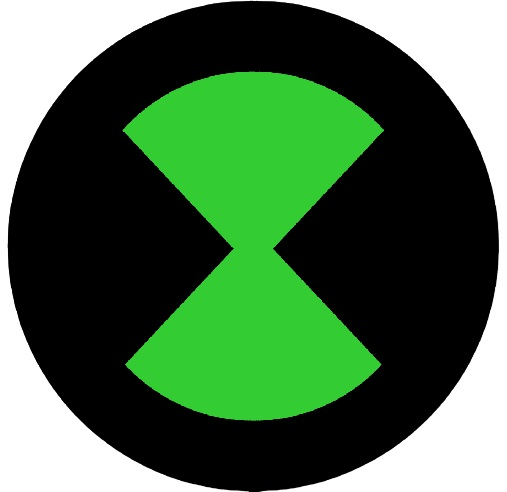

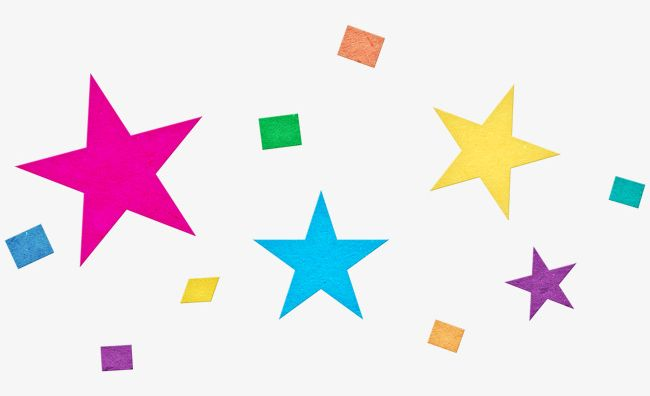

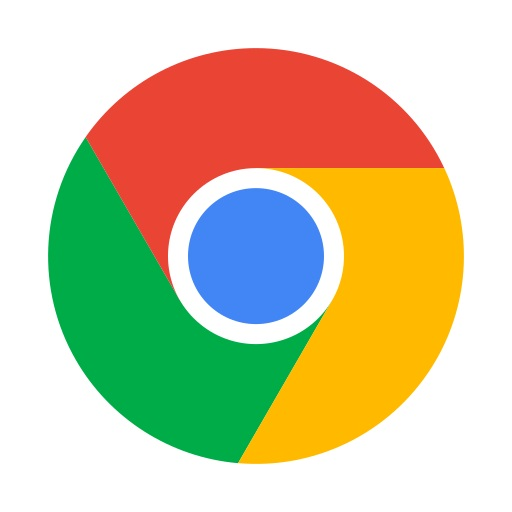

In [14]:
# read and display the provided images from "Target_Images" folder here

fun_path = "drive/MyDrive/CV_Assignments/Target_Images"

target_images = []

# Simply displaying all the images in the folder
string = fun_path +'/*.jpg'
for img in glob.glob(string):
  n = cv2.imread(img)
  cv2_imshow(n)
  target_images.append(n)


### Combining Filters 
We can use a combination of filters to detect complex shapes other than lines. For this we will be using the images from the "Target_images" folder. </br>
Using only the above filters to detect the edges. </br>

1. Display the original image.
2. Preprocess the image.
2. Combine the above filters to create a filter which will detect horizontal, vertical, diagonal lines, or cirlcular patterns (as per your need).
3. Apply the filter using `conv2d` and display the output.
4. Use MSE (Mean Squared Error) to find the difference between the output and the preprocessed image.

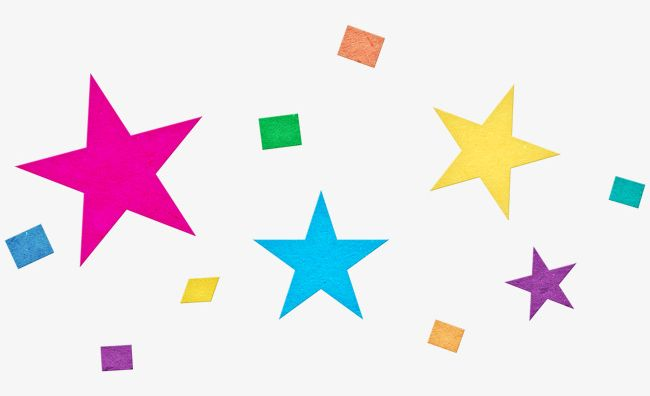

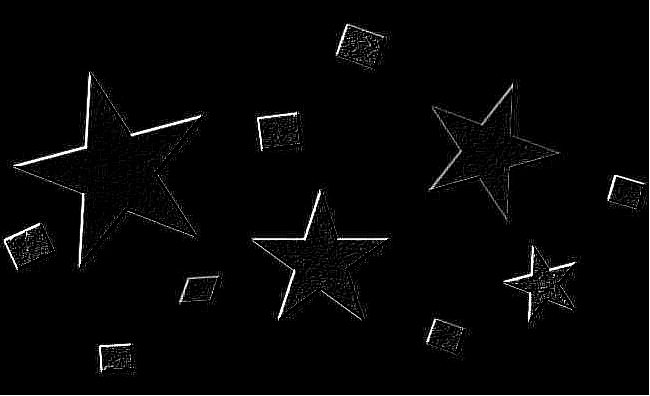

MSE =  69192.08233877234


In [15]:
# initialize and apply detection filter on "stars.jpg" image and display result

# combining the straight line filters since that is all stars are made of
stars_filter = h_filter + v_filter + lrDiag_filter + rlDiag_filter

before = target_images[1]
cv2_imshow(before)
middle = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after = conv2D(middle,stars_filter,1,1)
cv2_imshow(after)

MSE = np.square(np.subtract(middle,after)).mean()
print("MSE = ", MSE)


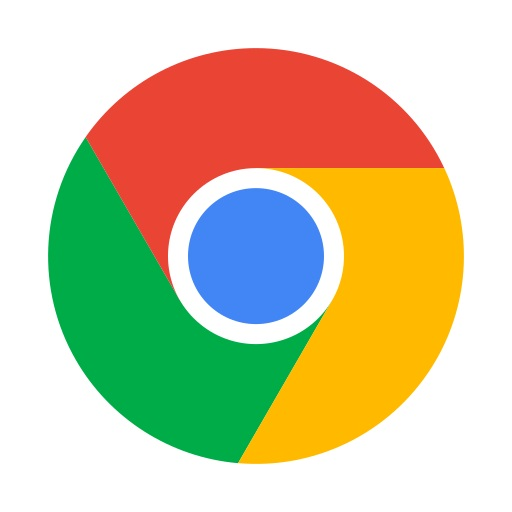

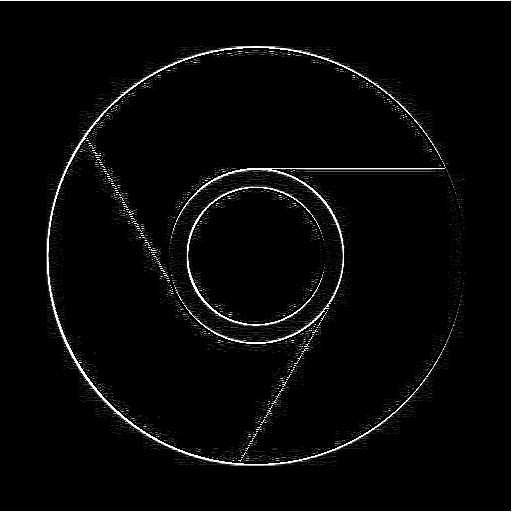

MSE =  359028.25537109375


In [16]:
# initialize and apply detection filter on "chrome_logo.jpg" image and display result

# Using the circle filter due to the circular logo. The diagonals and horizontal edge filters are used because of the lines in the logo itself
# The diagonal and horizontal filters were amplified due to the similar values in intensity of pizels in the grayscaled image.
# The values were tuned till a satisfactory filtered image was seen.
chrome_filter = c_filter + 4 * lrDiag_filter + 4 * rlDiag_filter + 10 * h_filter

before = target_images[2]
cv2_imshow(before)
middle = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after = conv2D(middle,chrome_filter,1,1)
cv2_imshow(after)

MSE = np.square(np.subtract(middle,after)).mean()
print("MSE = ", MSE)

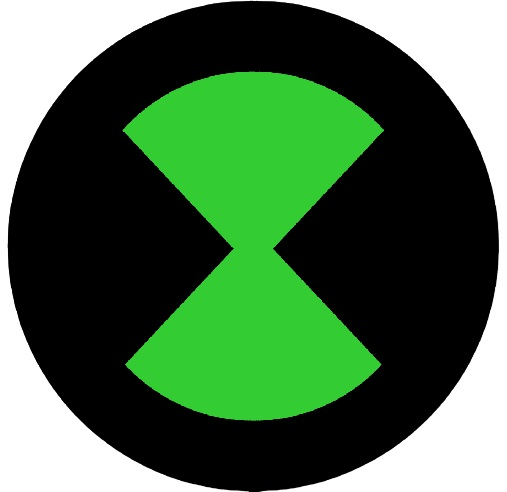

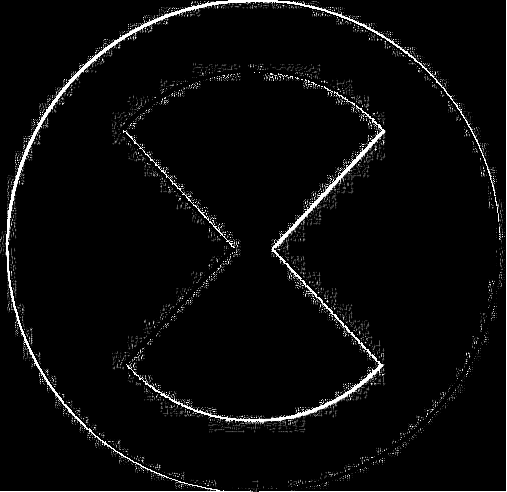

MSE =  3238684.7836348037


In [17]:
# initialize and apply detection filter on "ben_10.jpg" image and display result

# Only circular and diagonal edges are in the logo so only those were combined
# The circular filter was amplified because the lines were not very cleaer otherwise
ben10_filter = 10*c_filter + lrDiag_filter + rlDiag_filter


before = target_images[0]
cv2_imshow(before)
middle = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)
after = conv2D(middle,ben10_filter,1,1)
cv2_imshow(after)

MSE = np.square(np.subtract(middle,after)).mean()
print("MSE = ", MSE)


### Filter Bank for texture detection to classify images 🚁
There are numerous filter banks which can be used to classify the images. One such filter bank is  **Leung-Malik Fitler Bank** which was introduced by Thomas Leung and Jetindera Malik in their paper "[Representing and Recognizing the Visual Appearance of Materials using Three-dimensional Textons](http://people.eecs.berkeley.edu/~malik/papers/LM-3dtexton.pdf)"</br></br>
The LM filter bank is designed to capture various **texture** features in the images. The LM filter bank has a mix of edge, bar and spot filters at multiple scales and orientations. It has a total of 48 filters - 2 Gaussian derivative filters at 6 orientations and 3 scales, 8 Laplacian of Gaussian filters and 4 Gaussian filters as shown below:</br></br>
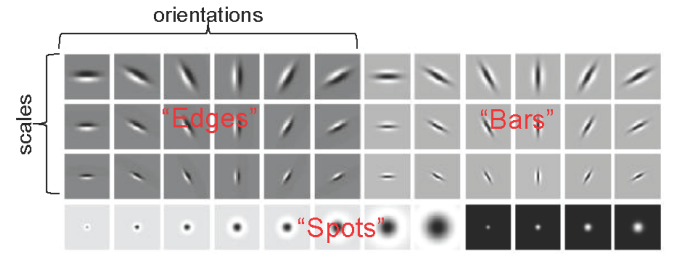

Some of the important LM filters (5x5) are given to you in the code section below. You can visualize them by running the cell.


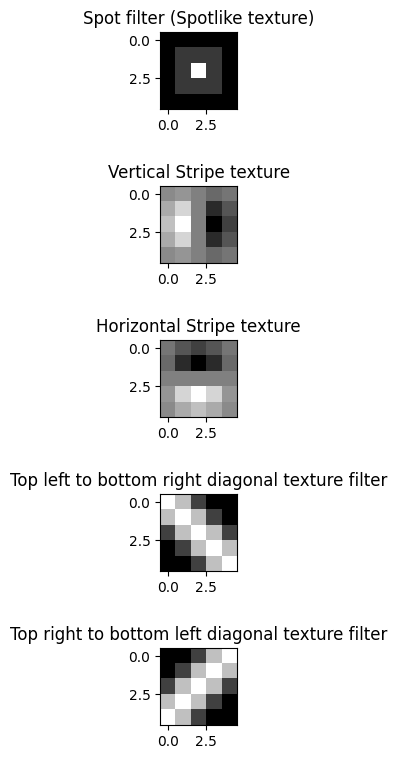

In [18]:
# Spot filter (Spotlike texture)
spot = np.array([[-1, -1, -1, -1, -1],
                 [-1,  1,  1,  1, -1],
                 [-1,  1,  8,  1, -1],
                 [-1,  1,  1,  1, -1],
                 [-1, -1, -1, -1, -1]])

# Vertical filter (Vertical Stripe texture)
vertical = np.array([[1, 2, 0, -2, -1],
                     [4, 8, 0, -8, -4],
                     [6,12, 0,-12, -6],
                     [4, 8, 0, -8, -4],
                     [1, 2, 0, -2, -1]])

# Horizontal filter (Horizontal Stripe texture)
horizontal = np.array([[-1, -4, -6, -4, -1],
                      [-2, -8,-12, -8, -2],
                      [ 0,  0,  0,  0,  0],
                      [ 2,  8, 12,  8,  2],
                      [ 1,  4,  6,  4,  1]])

# Diagonal filter (top left To bottom right)
diagonal_tlTbr = np.array([
                      [ 2,  1, -1, -2, -2],
                      [ 1,  2,  1, -1, -2],
                      [-1,  1,  2,  1, -1],
                      [-2, -1,  1,  2,  1],
                      [-2, -2, -1,  1,  2]])

# Diagonal filter (top right To bottom left)
diagonal_trTbl = np.array([
                      [-2, -2, -1,  1,  2],
                      [-2, -1,  1,  2,  1],
                      [-1,  1,  2,  1, -1],
                      [ 1,  2,  1, -1, -2],
                      [ 2,  1, -1, -2, -2]])

fig, axarr = plt.subplots(5, 1)
axarr[0].set_title('Spot filter (Spotlike texture)')
axarr[0].imshow(spot,cmap='gray')

axarr[1].set_title('Vertical Stripe texture')
axarr[1].imshow(vertical,cmap='gray')

axarr[2].set_title('Horizontal Stripe texture')
axarr[2].imshow(horizontal,cmap='gray')

axarr[3].set_title('Top left to bottom right diagonal texture filter')
axarr[3].imshow(diagonal_tlTbr,cmap='gray')

axarr[4].set_title('Top right to bottom left diagonal texture filter')
axarr[4].imshow(diagonal_trTbl,cmap='gray')

fig.set_size_inches(6, 9)
plt.subplots_adjust(hspace=1)

## Image Classification
In this part we will be using images from the `classifcation` folder. First, we will read train images of spiderman's and thanos's images (`train_spidey.jpg` and `train_thanos.png` respectively). Then, we'll use the filter bank defined above to classify the images in the `test` folder </br></br>

#### Creating feature vector
We'll be creating a feature vector for each image (for their individual features) and then calculate the Eucledean distance among the corresponding feture vectors between the testing and the training images (refer to the lecture-03 slides for this). </br></br>After apply the filters defined above (as per need) on the training and test images, we'll need to perform average pooling to create a feature vector.

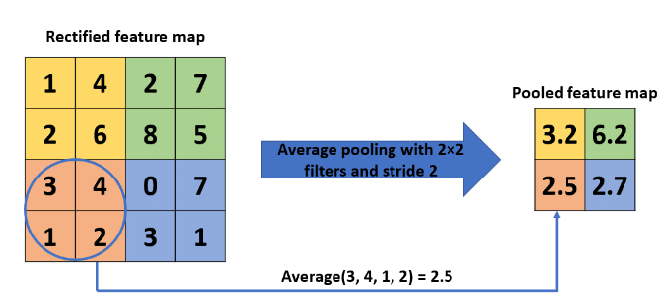

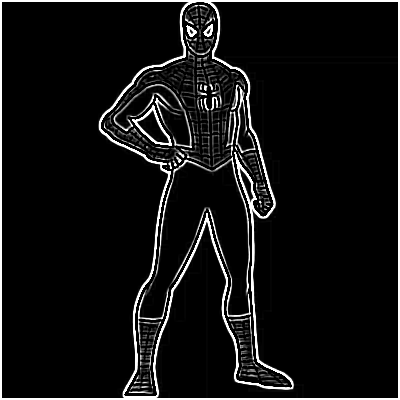

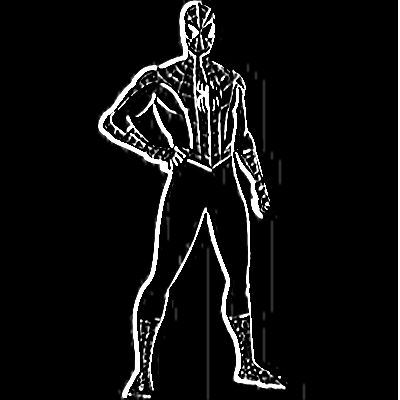

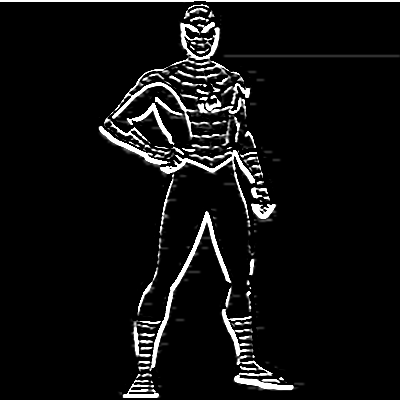

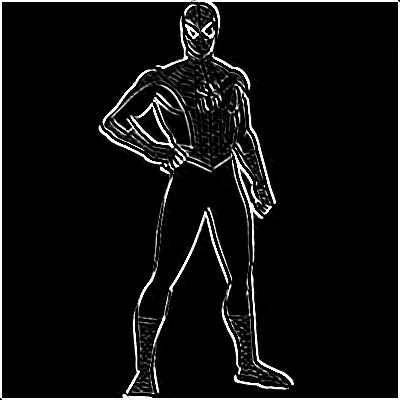

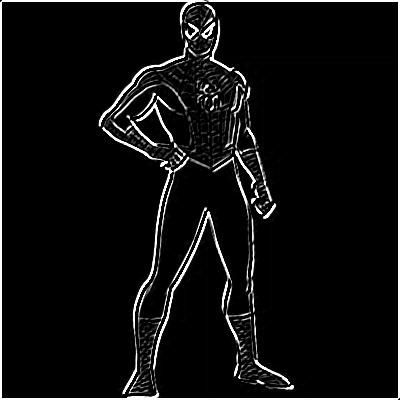

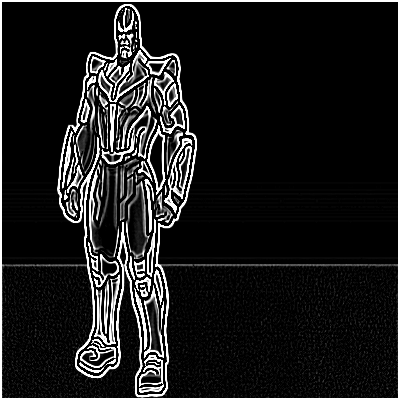

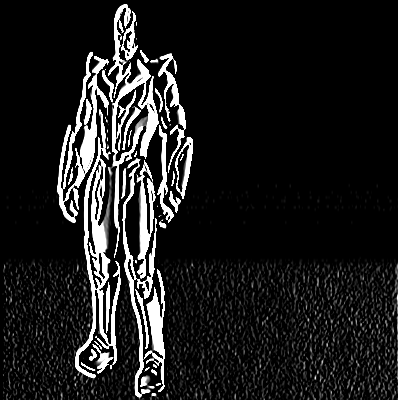

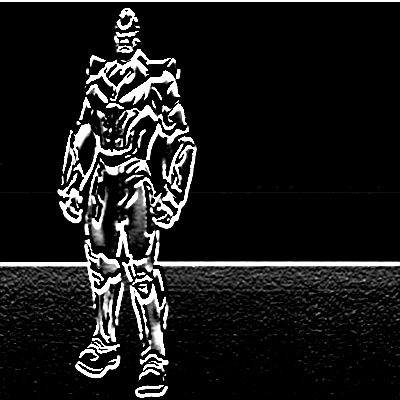

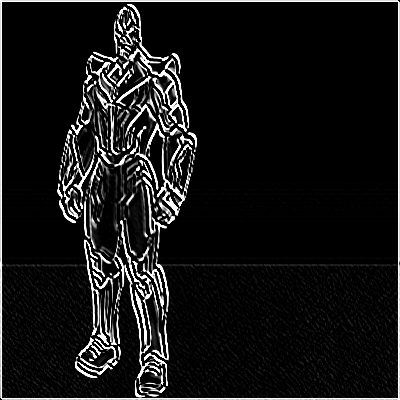

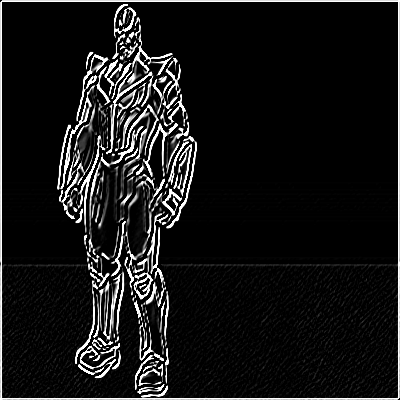

In [19]:
# Step 1: Read the image 'train_spidey.jpg' from the classification folder.
# Step 2: Convert the image from RGB to gray Scale.
# Step 3: Resize the image to it to 400x400.
# Step 4: Apply the filters to the resized greyscalled image and display the results.
# Step 5: Perform average pooling with 10x10 filter and stride 10, this will give you 40x40 image matrix.
# Step 6: Store the 40x40 i.e 800 values in a vector. That vector will be your feature vector.
# Step 7: Concatenate all feature vectors. If you have applied n filter then this step will result in nx800 matrix of image features.
# Step 8: Repeat Step#1 till Step#7 for 'train_thanos.png'.

# Making a filter bank and pooling filter
filter_bank = [spot, vertical, horizontal, diagonal_tlTbr, diagonal_trTbl]
pooling_filter = np.ones((10,10))
pooling_filter = np.divide(pooling_filter,100)

# Reading the image
train_spidey_path = "drive/MyDrive/CV_Assignments/classification/train_spidey.jpg"
train_spidey_img = cv2.imread(train_spidey_path)
# COnverting to grayscale
train_spidey_img = cv2.cvtColor(train_spidey_img, cv2.COLOR_BGR2GRAY)
# Resizing image to 400x400
train_spidey_img = cv2.resize(train_spidey_img, (400,400), interpolation= cv2.INTER_LINEAR)



spidey_filter_results = []
# Loop for applying all filters
for filter in filter_bank:
  res = conv2D(train_spidey_img,filter,2,1)
  # Showing image after filter
  cv2_imshow(res)

  # Average pooling
  pooled_res = conv2D(res,pooling_filter,0,10)

  # Flattening and storing into a 1D array. This is the feature vector.
  flat_res = pooled_res.flatten()

  # Concatenating the feature vectors
  spidey_filter_results.append(flat_res)

# Converting to numpy for easy manipulation
spidey_filter_results = np.array(spidey_filter_results)


# Repeating everything for the Thanos image
train_thanos_path = "drive/MyDrive/CV_Assignments/classification/train_thanos.png"
train_thanos_img = cv2.imread(train_thanos_path)
train_thanos_img = cv2.cvtColor(train_thanos_img, cv2.COLOR_BGR2GRAY)
train_thanos_img = cv2.resize(train_thanos_img, (400,400), interpolation= cv2.INTER_LINEAR)


thanos_filter_results = []
for filter in filter_bank:
  res = conv2D(train_thanos_img,filter,2,1)
  cv2_imshow(res)

  pooled_res = conv2D(res,pooling_filter,0,10)

  flat_res = pooled_res.flatten()
  thanos_filter_results.append(flat_res)


thanos_filter_results = np.array(thanos_filter_results)



### Evaluate Results
Classify each test image based on the Eucledean distances calculated between each corresponding feature vector. </br>


In [20]:
# Step 1: Read the images from the 'test' folder (apply the necessary pre-processing techinques).
# Step 2: Create feature vectors for each test image.
# Step 3: Compute the Euclidean distance between features of 'train_spidey.jpg' image with the features of each of the test image.
# Step 4: Compute the Euclidean distance between features of 'train_thanos.png' image with the features of each of the test image.
# Step 3: Classify each of the test image as either Spider-Man or Thanos based on the minimum value of Euclidean distance among the feature vectors.

# Function to get features from an image. Basically a generalized version of what we did in the last cell
def getFeatures (path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (400,400), interpolation= cv2.INTER_LINEAR)

  filter_results = []
  for filter in filter_bank:
    res = conv2D(img,filter,2,1)

    pooled_res = conv2D(res,pooling_filter,0,10)

    flat_res = pooled_res.flatten()
    filter_results.append(flat_res)


  filter_results = np.array(filter_results)
  return filter_results

# Function to classify an image
def classify(path):

  image_features = getFeatures(path)

  # Calculating the Euclidean distance between this image's feature vector and the train images' feature vectors
  spidey_dist = np.sum(np.square(spidey_filter_results - image_features))
  thanos_dist = np.sum(np.square(thanos_filter_results - image_features))

  # Comparing the two distances calculated and returning the label of the closer one
  if spidey_dist < thanos_dist:
    return "Spider-man"
  else:
    return "Thanos"

In [21]:
# The paths for all the images
test_spidey1_path = "drive/MyDrive/CV_Assignments/classification/test/test_spidey1.jpg"
test_spidey2_path = "drive/MyDrive/CV_Assignments/classification/test/test_spidey2.jpg"

test_thanos1_path = "drive/MyDrive/CV_Assignments/classification/test/test_thanos1.png"
test_thanos2_path = "drive/MyDrive/CV_Assignments/classification/test/test_thanos2.jpg"

# Calling the classify function on all the images and printing the results
print("Classification for test_spidey1:", classify(test_spidey1_path) )
print("Classification for test_spidey2:", classify(test_spidey2_path) )
print("Classification for test_thanos1:", classify(test_thanos1_path) )
print("Classification for test_thanos2:", classify(test_thanos2_path) )


Classification for test_spidey1: Spider-man
Classification for test_spidey2: Spider-man
Classification for test_thanos1: Thanos
Classification for test_thanos2: Thanos
